# Exercise: Clustering Algorithms with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

In [18]:
alph=[A,B,C,D,E,F]

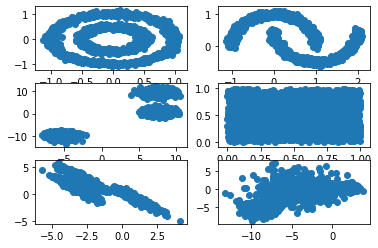

In [15]:
fig, ax=plt.subplots(3,2)
ax[0,0].scatter(A[:,0], A[:,1])
ax[0,1].scatter(B[:,0], B[:,1])
ax[1,0].scatter(C[:,0], C[:,1])
ax[1,1].scatter(D[:,0],D[:,1])
ax[2,0].scatter(E[:,0], E[:,1])
ax[2,1].scatter(F[:,0], F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

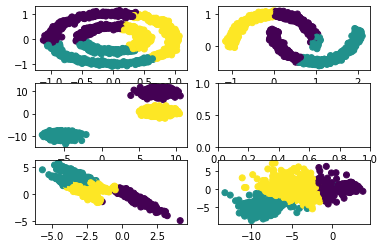

In [46]:
from sklearn.cluster import KMeans
fig, ax=plt.subplots(3,2)
q=0
for i,L in enumerate(alph):
    model = KMeans(n_clusters=3,max_iter=500, random_state=42)
    model.fit(L)
    if q==2:
        q=0
    ax[round(i/2),q].scatter(L[:,0],L[:,1],c=model.labels_)
    q+=1

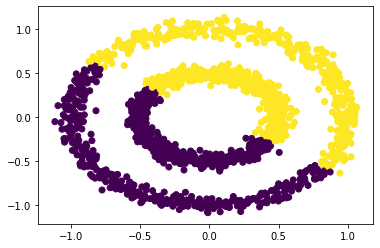

In [27]:
from sklearn.cluster import KMeans
modelA = KMeans(n_clusters=2,max_iter=500, random_state=42)
modelA.fit(A)
modelA.predict(np.array([[0,4]]))
plt.scatter(A[:,0],A[:,1],c=modelA.labels_)


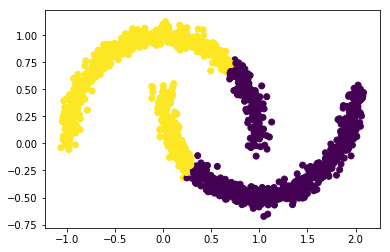

In [46]:
from sklearn.cluster import KMeans
modelB = KMeans(n_clusters=2,max_iter=500, random_state=42)
modelB.fit(B)

plt.scatter(B[:,0],B[:,1],c=modelB.labels_)


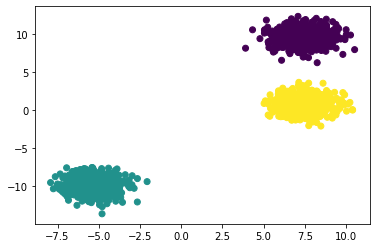

In [29]:
from sklearn.cluster import KMeans
modelC = KMeans(n_clusters=3,max_iter=500, random_state=42)
modelC.fit(C)

plt.scatter(C[:,0],C[:,1],c=modelC.labels_)

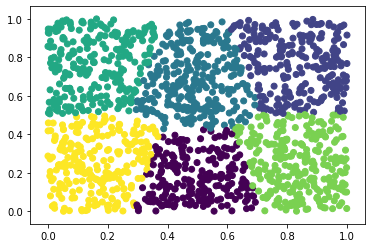

In [34]:
from sklearn.cluster import KMeans
modelD = KMeans(n_clusters=6,max_iter=500, random_state=42)
modelD.fit(D)

plt.scatter(D[:,0],D[:,1],c=modelD.labels_)

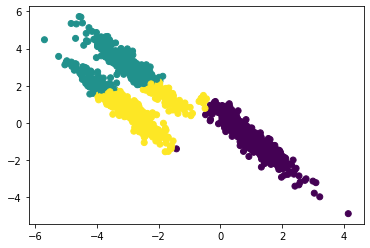

In [52]:
from sklearn.cluster import KMeans
modelE = KMeans(n_clusters=3,max_iter=500, random_state=42)
modelE.fit(E)

plt.scatter(E[:,0],E[:,1],c=modelE.labels_)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

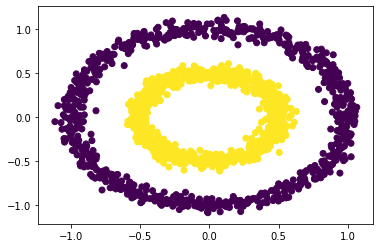

In [83]:
from sklearn.cluster import DBSCAN
dbA = DBSCAN(eps=0.2, min_samples=10)
dbA.fit(A)
plt.scatter(A[:,0], A[:,1], c=dbA.labels_)

[0 0 0 ... 0 0 0]


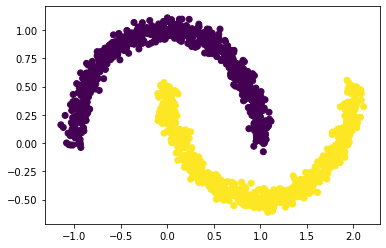

In [81]:
from sklearn.cluster import DBSCAN
dbB = DBSCAN(eps=0.2, min_samples=10)
dbB.fit(B)
plt.scatter(B[:,0], B[:,1], c=dbB.labels_)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

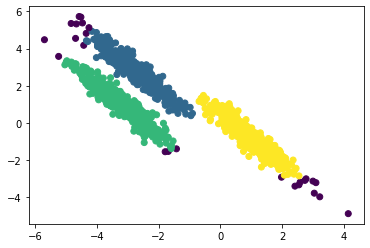

In [72]:
dbE = DBSCAN(eps=0.4, min_samples=12)
dbE.fit(E)
plt.scatter(E[:,0], E[:,1], c=dbE.labels_)

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [84]:
from sklearn.metrics import silhouette_score
scA=silhouette_score(A, dbA.labels_)
print(scA)
scB=silhouette_score(B, dbB.labels_)
print(scB)

0.11281411178319635
0.33395680413746165
